# **STATISTIKA**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import scipy.stats

### **DISTRIBUSI BINOMIAL**
SYARAT:

*   Banyak eksperimen merupakan bilangan  tetap
*   Setiap eksperimen mempunyai dua hasil sukses dan gagal
*   Probabilitas sukses harus sama pada setiap eksperimen
*   Eksperimen harus bebas satu sama lain


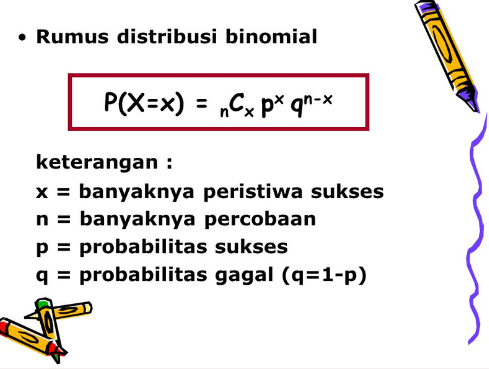



**CONTOH SOAL**
<BR>
<font face="gotham" color="purple">Di Prodi Fisika ada 5 mahasiswa berpartisipasi dalam lomba olimpiade sains tinglkatn nasional, dimana tingkat kelulusannya sebesar 60%. Hitunglah probabilitas saat kondisi paling banyak 2 mahasiswa yang lulus lomba tingkat nasional!</font>

<br>
Pertama kita dapat menjawab berapa probabilitas saat kondisi paling banyak 2 mahasiswa yang lulus lomba tingkat nasional?



In [10]:
n = 5
k1 = 2
k2 = 1
k3 = 0
b1 = scipy.special.comb(5, 2)
b2 = scipy.special.comb(5, 1)
b3 = scipy.special.comb(5, 0)
p = .6
f1 = b1*p**k1*(1-p)**(n-k1)
f2 = b2*p**k2*(1-p)**(n-k2)
f3 = b3*p**k3*(1-p)**(n-k3)
f_bino = f1+f2+f3
print('Kemungkinan kondisi paling banyak 2 mahasiswa lulus lomba tingkat nasional adalah {1:.2f}%.'.format(k, f_bino * 100))

Kemungkinan kondisi paling banyak 2 mahasiswa lulus lomba tingkat nasional adalah 31.74%.


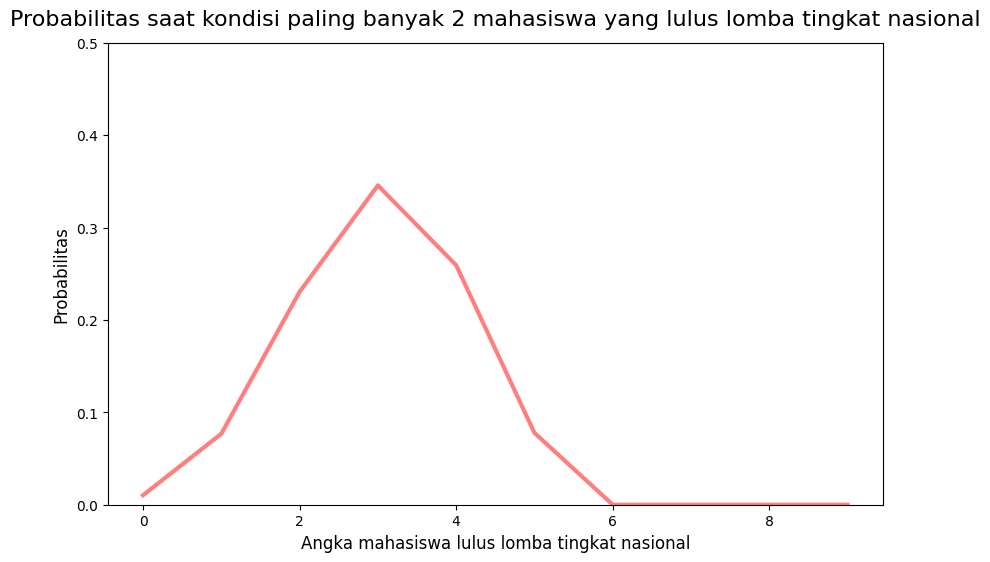

In [34]:
n = 5
p = 0.6
lulus = np.arange(0, 10)
y = sp.stats.binom.pmf(lulus, n, p)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(lulus, y, lw=3, color='r', alpha=0.5)
ax.set_ylim([0, 0.5])
ax.set_title('Probabilitas saat kondisi paling banyak 2 mahasiswa yang lulus lomba tingkat nasional', size=16, x=0.5, y=1.02)
ax.set_xlabel('Angka mahasiswa lulus lomba tingkat nasional', size=12)
ax.set_ylabel('Probabilitas', size=12)
plt.show()

## **HIPERGEOMETRIK**
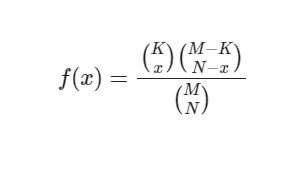

**CONTOH SOAL**
<br>
<font face="gotham" color="purple"> Misalkan dalam suatu rak terdapat 50 kain batik yang diantaranya 5 rusak. bila diambil kain sebanyak 4 helai secara acak. maka hitunglah probabilitas untuk memperoleh 2 helai kain yang rusak?</font>

Solusi:

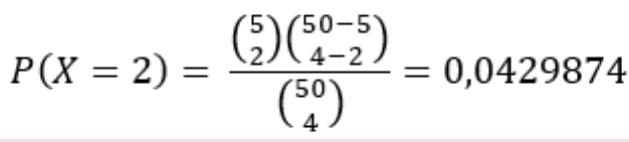

In [36]:
C = sp.special.comb(5, 2)*sp.special.comb(45, 2) /sp.special.comb(50, 4)
print('Probabilitas memperoleh 2 helai kain yang rusak %1.6f%%.'% (C*100))

Probabilitas memperoleh 2 helai kain yang rusak 4.298741%.


## **DISTRIBUSI POISSON**

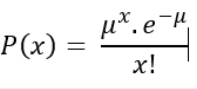

**CONTOH SOAL**

<font face="gotham" color="purple">Sebuah konveksi pakaian menggunakan 20 mesin jahit. aprobabilitas sebuah mesin jahit mengalamai dan memerlukan perbaikan adalah 0,02. tentukan probabilitas dari 3 mesin yyang akan mengalami gangguan dan memerlukan perbaikan?<font>

Solusi:

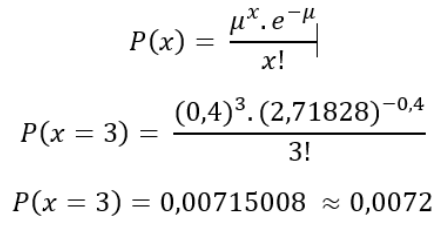

In [49]:
k = 3
n = 20
p = 0.02
lambdaP = p * n # lambda in Poisson
p = sp.stats.poisson.pmf(k, lambdaP)
print('probabilitas dari 3 mesin yyang akan mengalami gangguan dan memerlukan perbaikan adalah {1:.2f}%.'.format(k, p*100))

probabilitas dari 3 mesin yyang akan mengalami gangguan dan memerlukan perbaikan adalah 0.72%.


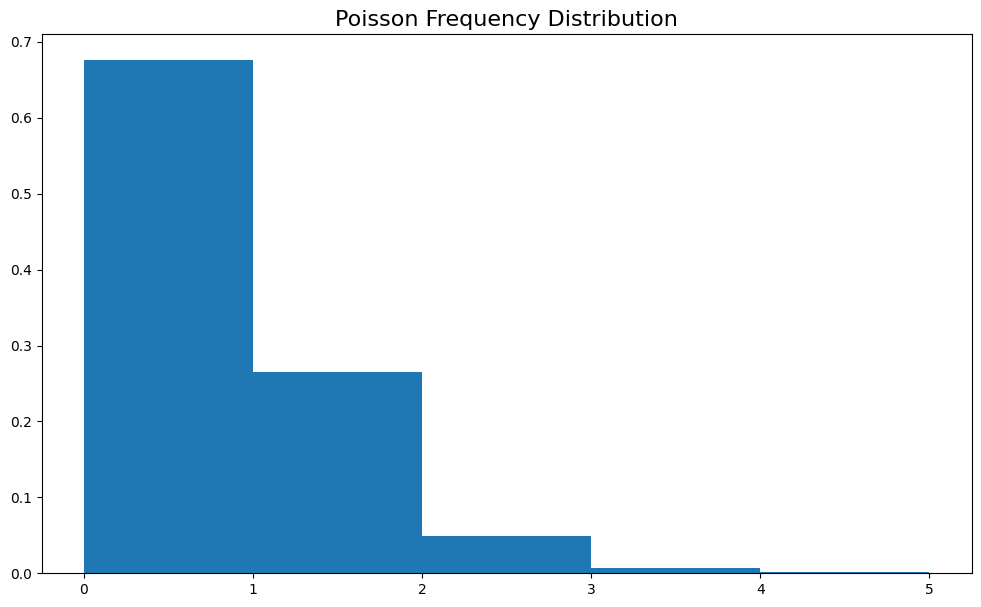

In [47]:
poiss = sp.stats.poisson.rvs(lambdaP, size = 10000)
fig, ax = plt.subplots(figsize = (12, 7))
h, bins, patches = ax.hist(poiss, density = True, bins = 5)
ax.set_title('Poisson Frequency Distribution', size = 16)
plt.show()

## **DISTRIBUSI NORMAL**

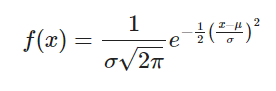

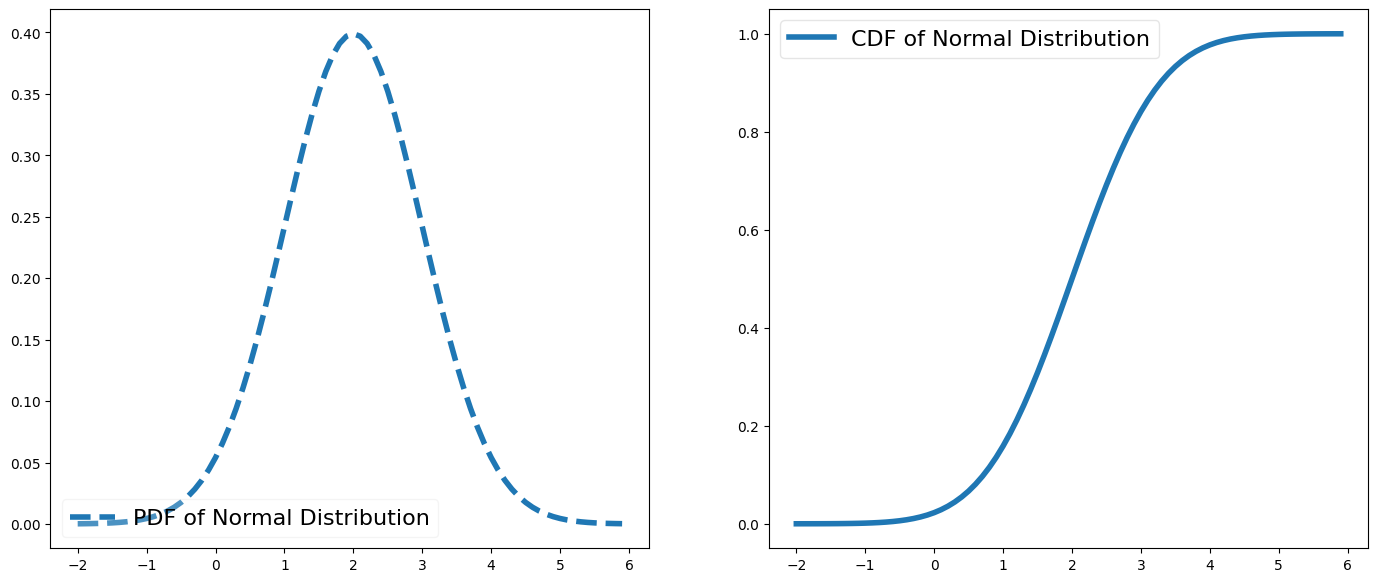

In [50]:
mu = 2
sigma = 1
x = np.arange(-2, 6, 0.1)
norm_pdf = sp.stats.norm.pdf(x, mu, sigma)
norm_cdf = sp.stats.norm.cdf(x, mu, sigma)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (17, 7))
ax[0].plot(x,norm_pdf, lw = 4, label = 'PDF of Normal Distribution', ls = '--')
ax[0].legend(fontsize = 16, loc = 'lower left', framealpha=0.2)

ax[1].plot(x,norm_cdf, lw  = 4, label = 'CDF of Normal Distribution')
ax[1].legend(fontsize = 16,fancybox=True, framealpha=0.5)
plt.show()

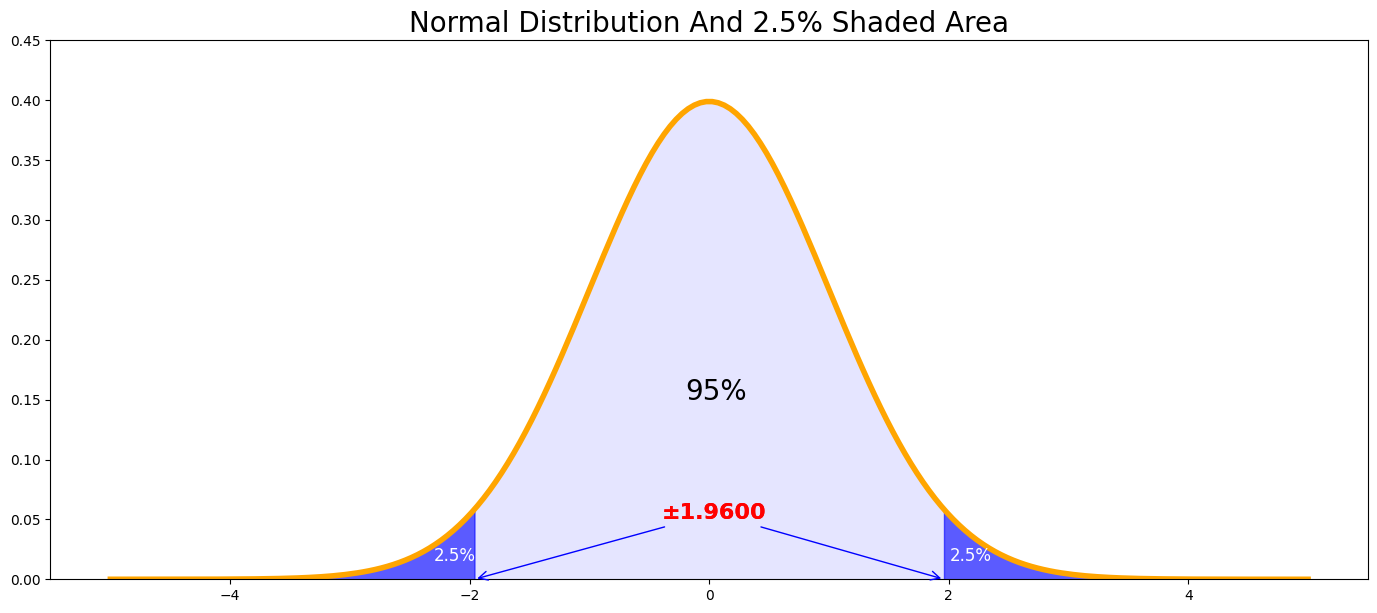

In [51]:
norm_95_r = sp.stats.norm.ppf(.975) # ppf mean point percentage function, actually inverse CDF
norm_95_l = sp.stats.norm.ppf(.025)

x = np.linspace(-5, 5, 200)
y = sp.stats.norm.pdf(x)

xl = np.linspace(-5, norm_95_l, 100)
yl = sp.stats.norm.pdf(xl)
xr = np.linspace(norm_95_r, 5, 100)
yr = sp.stats.norm.pdf(xr)

fig, ax = plt.subplots(figsize = (17, 7))
ax.plot(x,y, lw = 4, label = 'PDF of Normal Distribution', ls = '-', color = 'orange')
ax.set_ylim([0, .45])

ax.fill_between(x, y, 0, alpha=0.1, color = 'blue')
ax.fill_between(xl,yl, 0, alpha=0.6, color = 'blue')
ax.fill_between(xr,yr, 0, alpha=0.6, color = 'blue')

ax.text(-.2, 0.15, '95%', fontsize = 20)
ax.text(-2.3, 0.015, '2.5%', fontsize = 12, color = 'white')
ax.text(2.01, 0.015, '2.5%', fontsize = 12, color = 'white')

ax.annotate('±%.4f' %norm_95_r, xy = (norm_95_r, 0), xytext = (-.4, .05), weight = 'bold', color  =  'r',
             arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'b'), fontsize = 16)
ax.annotate('±%.4f' %norm_95_r, xy = (norm_95_l, 0), xytext = (-.4, .05), weight = 'bold', color  =  'r',
             arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'b'), fontsize = 16)

ax.set_title('Normal Distribution And 2.5% Shaded Area', size = 20)
plt.show()

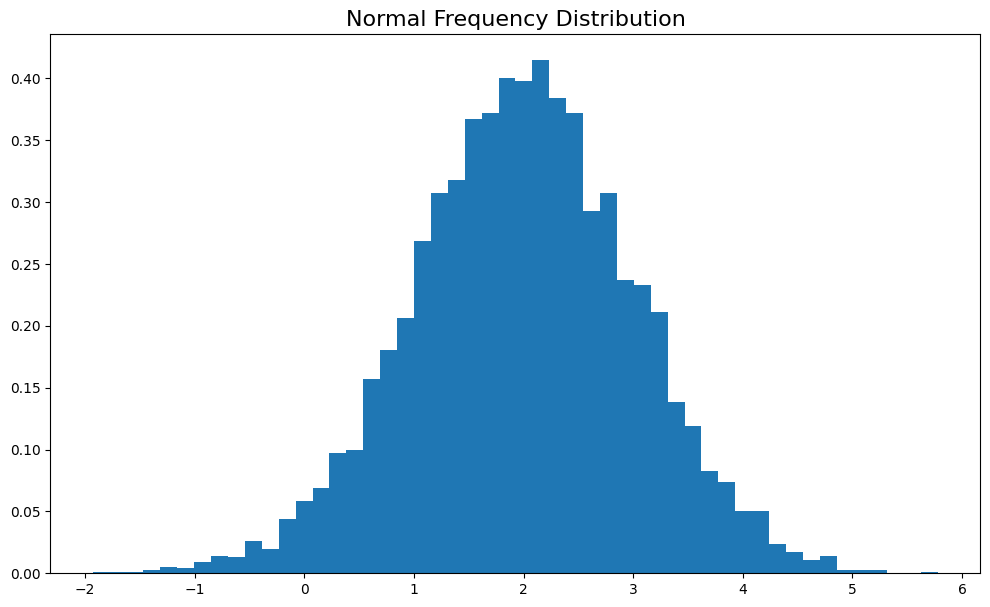

In [52]:
# rvs(loc=0, scale=1, size=1, random_state=None)
norm_rv = sp.stats.norm.rvs(mu, sigma, size = 5000)
fig, ax = plt.subplots(figsize = (12, 7))
h, bins, patches = ax.hist(norm_rv, density = True, bins = 50)
ax.set_title('Normal Frequency Distribution', size = 16)
plt.show()

**CONTOH SOAL**

<font face="gotham" color="purple"> Distribusi berat badan 8500 orang mahasiswa diketahui mendekati normal dengan mean 53 kg dan deviasi standar 3 kg. dari data tersebut Hitunglah persentase banyak mahasiswa yang berat badannya antara 50 kg dan 55 kg! </font>

Solusi:

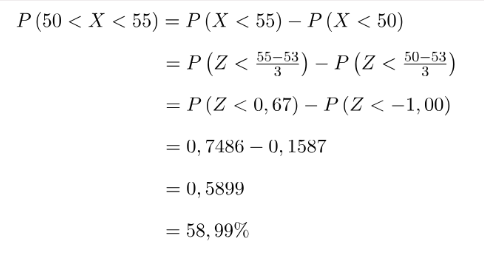


In [7]:
from scipy.stats import norm

mean = 53  # Rata-rata
std_dev = 3  # Standar deviasi

lower_bound = 50
upper_bound = 55

prob_lower = norm.cdf(lower_bound, mean, std_dev)
prob_upper = norm.cdf(upper_bound, mean, std_dev)
percentage = (prob_upper - prob_lower) * 100

print("Persentase mahasiswa dengan berat badan antara 50 kg dan 55 kg adalah: {:.2f}%".format(percentage))

Persentase mahasiswa dengan berat badan antara 50 kg dan 55 kg adalah: 58.89%


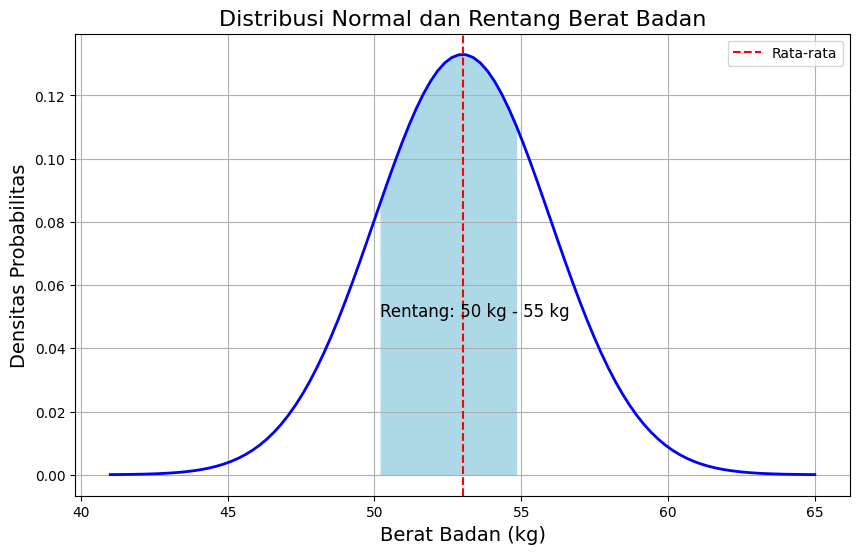

In [8]:

# Plot distribusi normal
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100)
y = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.fill_between(x, y, where=((x >= lower_bound) & (x <= upper_bound)), color='lightblue')

# Anotasi untuk rentang yang diminta
plt.text(lower_bound + 0.2, 0.05, 'Rentang: 50 kg - 55 kg', fontsize=12)

# Penanda untuk mean
plt.axvline(mean, color='r', linestyle='--', label='Rata-rata')

plt.title('Distribusi Normal dan Rentang Berat Badan', fontsize=16)
plt.xlabel('Berat Badan (kg)', fontsize=14)
plt.ylabel('Densitas Probabilitas', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## **DISTRIBUSI STUDENT**

**CONTOH SOAL**

<font face="gotham" color="purple"> Periode kehamilan manusia, periode waktu antara konsepsi dan persalinan, adalah sekitar 40 minggu (280 hari), diukur dari hari pertama periode menstruasi terakhir ibu. Untuk bayi cukup bulan yang baru lahir, panjang bayi yang sesuai untuk usia kehamilan Ibu, diasumsikan berdistribusi normal dengan rata-rata = 50 cm dan standar deviasi = 1,25 cm. Hitunglah peluang bahwa sampel acak dari 20 bayi yang lahir pada waktunya, mempunyai rata-rata panjang lebih besar dari 52,5 cm.</font>


Solusi:

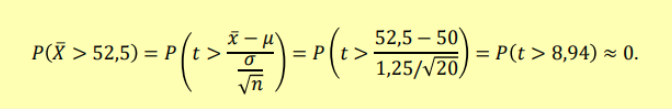

Peluang bahwa sampel acak dari 20 bayi memiliki rata-rata panjang lebih besar dari 52,5 cm adalah: 0.00%


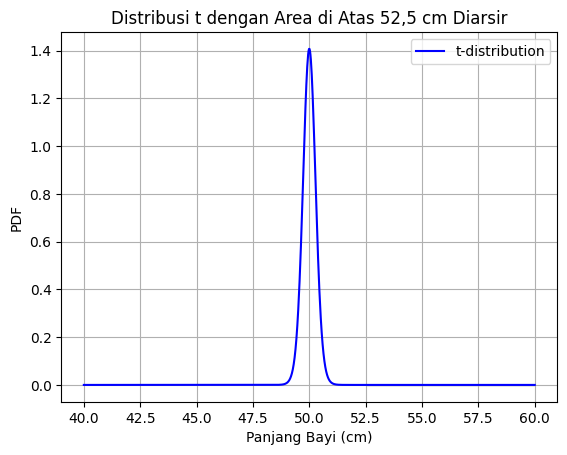

In [33]:
from scipy.stats import t

# Mean dan standar deviasi distribusi normal
mu = 50
sigma = 1.25

# Jumlah sampel (bayi)
n = 20

# Rata-rata sampel yang diinginkan
x_bar = 52.5

# Standar deviasi dari distribusi sampling (SEM)
sem = sigma / np.sqrt(n)

# Derajat kebebasan distribusi t
df = n - 1

# Hitung z-score untuk sampel
z_score = (x_bar - mu) / sem

# Hitung peluang menggunakan CDF (Cumulative Distribution Function)
probability = 1 - t.cdf(z_score, df)

print("Peluang bahwa sampel acak dari 20 bayi memiliki rata-rata panjang lebih besar dari 52,5 cm adalah: {:.2f}%".format(probability * 100))

# Plot distribusi t
x_values = np.linspace(40, 60, 1000)
y_values = t.pdf(x_values, df, loc=mu, scale=sem)

plt.plot(x_values, y_values, color='blue', label='t-distribution')
plt.fill_between(x_values[x_values > x_bar], y_values[x_values > x_bar], color='gray', alpha=0.5)
plt.title('Distribusi t dengan Area di Atas 52,5 cm Diarsir')
plt.xlabel('Panjang Bayi (cm)')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()


## **DISTRIBUSI CHI-SQUARE**

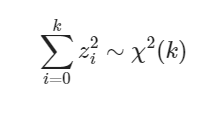

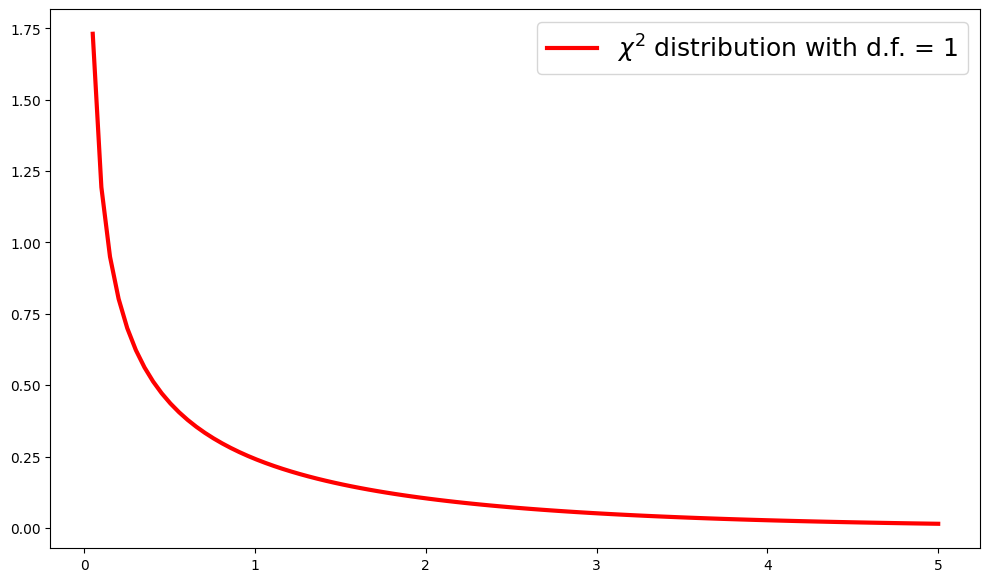

In [29]:
k = 1
x = np.linspace(0, 5, 100)
chi_pdf = stats.chi2.pdf(x, k)

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, chi_pdf, lw=3, c='r', label='$\chi^2$ distribution with d.f. = 1')
ax.legend(fontsize=18)
plt.show()


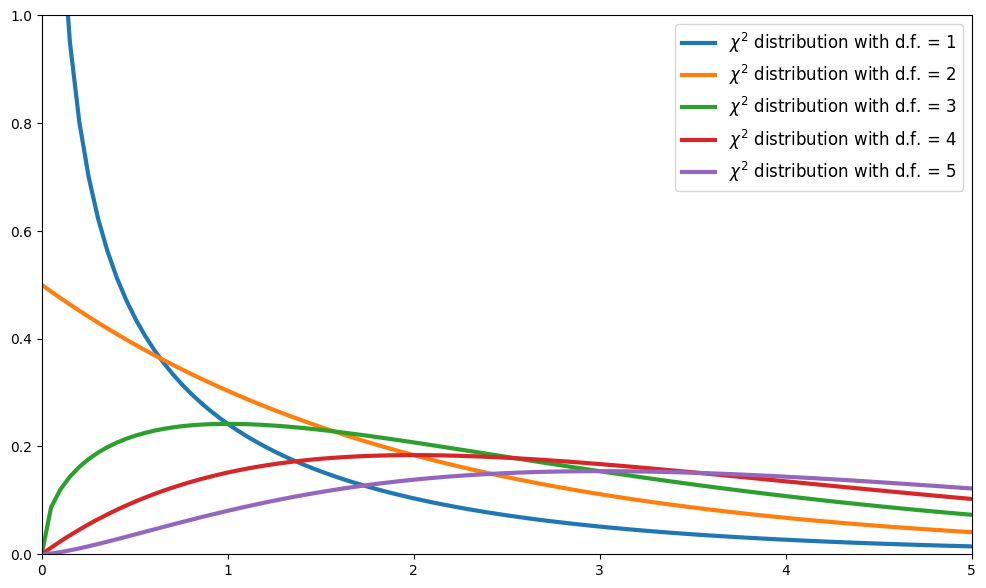

In [31]:
fig, ax = plt.subplots(figsize = (12, 7))
for i in range(1, 6):
    x = np.linspace(0, 5, 100)
    chi_pdf = stats.chi2.pdf(x, i)
    ax.plot(x, chi_pdf, lw = 3, label = '$\chi^2$ distribution with d.f. = %.0d'%i)
    ax.legend(fontsize = 12)
    ax.axis([0, 5, 0, 1])
plt.show()

**CONTOH SOAL**

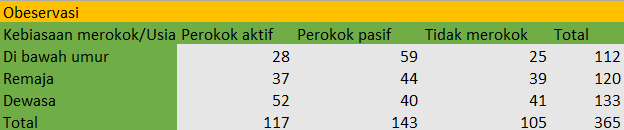

Solusi:

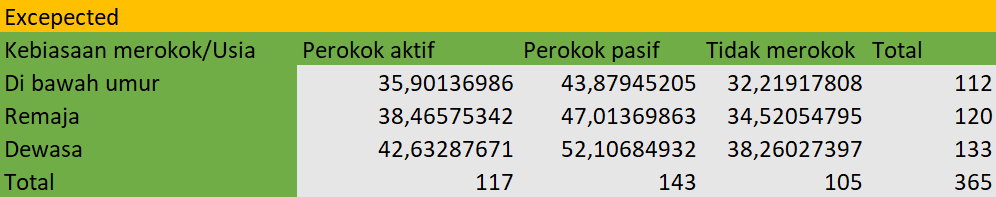
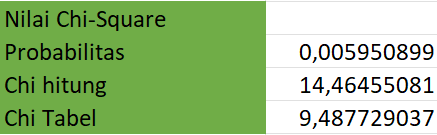

In [19]:
import pandas as pd

# Data observasi
observed_data = np.array([[28, 59, 25], [37, 44, 39], [52, 40, 41]])

# Tabel observasi
df_observed = pd.DataFrame(observed_data, index=['Dibawah Umur', 'Remaja', 'Dewasa'], columns=['Perokok Aktif', 'Perokok Pasif', 'Tidak Merokok'])
print("Tabel Observasi:")
print(df_observed)

# Hitung total per baris (kelompok usia)
row_totals = df_observed.sum(axis=1)

# Hitung total per kolom (tipe perokok)
col_totals = df_observed.sum(axis=0)

# Hitung total keseluruhan
total = df_observed.values.sum()

# Hitung expected frequencies
expected_data = np.outer(row_totals, col_totals) / total

# Tabel expected
df_expected = pd.DataFrame(expected_data, index=['Dibawah Umur', 'Remaja', 'Dewasa'], columns=['Perokok Aktif', 'Perokok Pasif', 'Tidak Merokok'])
print("\nTabel Expected:")
print(df_expected)


Tabel Observasi:
              Perokok Aktif  Perokok Pasif  Tidak Merokok
Dibawah Umur             28             59             25
Remaja                   37             44             39
Dewasa                   52             40             41

Tabel Expected:
              Perokok Aktif  Perokok Pasif  Tidak Merokok
Dibawah Umur      35.901370      43.879452      32.219178
Remaja            38.465753      47.013699      34.520548
Dewasa            42.632877      52.106849      38.260274


In [22]:
from scipy.stats import chi2

# Hitung total per baris (kelompok usia)
row_totals = np.sum(observed_data, axis=1)

# Hitung total per kolom (tipe perokok)
col_totals = np.sum(observed_data, axis=0)

# Hitung total keseluruhan
total = np.sum(observed_data)

# Hitung expected frequencies
expected_data = np.outer(row_totals, col_totals) / total

# Hitung nilai chi-square
chi_squared_stat = np.sum((observed_data - expected_data)**2 / expected_data)

# Hitung derajat kebebasan
dof = (observed_data.shape[0] - 1) * (observed_data.shape[1] - 1)

# Nilai alpha
alpha = 0.05

# Tentukan chi-square tabel
critical_value = chi2.ppf(1 - alpha, dof)

print("p-value:", p)
print("Derajat Kebebasan:", dof)
print("Chi-Square Hitung:", chi_squared_stat)
print("Chi-Square Tabel:", critical_value)

# Uji hipotesis
if chi_squared_stat > critical_value:
    print("Ho tidak dapat ditolak. Tipe perokok tidak bergantung pada kelompok usia.")
else:
    print("Ho ditolak. Tipe perokok bergantung pada kelompok usia.")


p-value: 0.005950899167188578
Derajat Kebebasan: 4
Chi-Square Hitung: 14.464550807032012
Chi-Square Tabel: 9.487729036781154
Ho tidak dapat ditolak. Tipe perokok tidak bergantung pada kelompok usia.


## **DISTRIBUSI F**

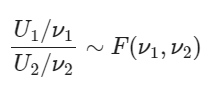

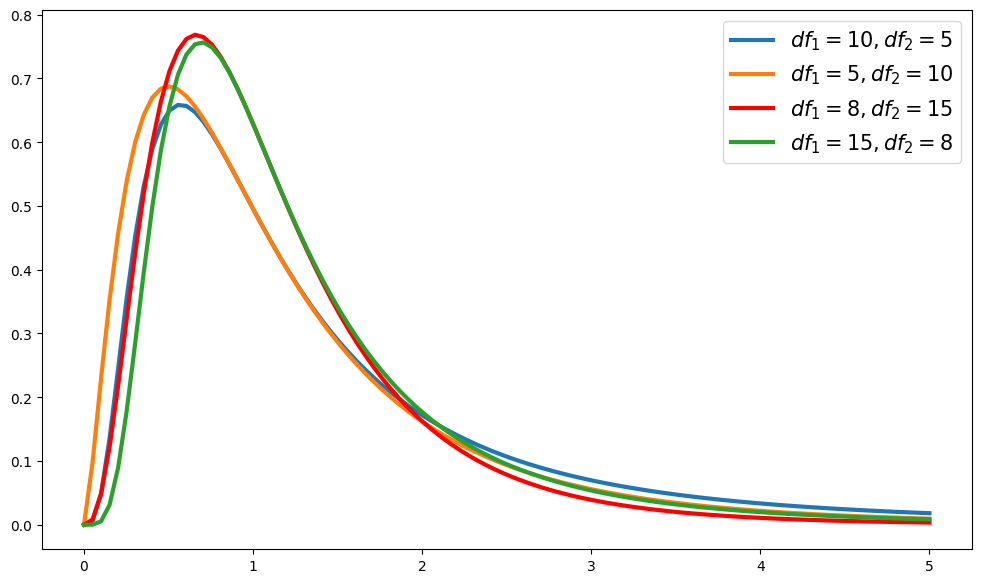

In [34]:
x = np.linspace(0, 5, 100)
fig, ax = plt.subplots(figsize=(12, 7))

df1 = 10
df2 = 5
f_pdf = stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, label='$df_1 = %d, df_2 = %d$' % (df1, df2))

df1 = 5
df2 = 10
f_pdf = stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, label='$df_1 = %d, df_2 = %d$' % (df1, df2))

df1 = 8
df2 = 15
f_pdf = stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, color='red', label='$df_1 = %d, df_2 = %d$' % (df1, df2))

df1 = 15
df2 = 8
f_pdf = stats.f.pdf(x, dfn=df1, dfd=df2)
ax.plot(x, f_pdf, lw=3, label='$df_1 = %d, df_2 = %d$' % (df1, df2))

ax.legend(fontsize=15)
plt.show()
